In [1]:
import pandas as pd #Importing important libraries
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = pd.read_csv('/content/Titanic_train.csv') #loading dataset
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.875,D,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.400,D28,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.300,B35,C
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.650,NaN,S


* **The Titanic_train.csv file contains information about passengers on the Titanic, including their survival status, passenger class, name, gender, age, family size, ticket information, fare, cabin number, and port of embarkation.**

* **This data can be used to analyze factors that influenced survival on the Titanic, such as passenger class, age, and gender.**

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Name, Sex, Ticket, Cabin and Embarked columns contains Object(String or character data)
* Remaining columns are integer columns except Fare and Age. Those are contains float values

In [5]:
titanic.isnull().mean() * 100 #find the % of missing values

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


* Age and Cabin columns contains missing values
* Cabin column cintains the highest no of missing values

In [6]:
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin']) #removing columns because those are not useful in model building
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic.describe() #Get statistical information about the data

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* The minimum age of a passenger is 0.42 means a newly born baby
* The maximum age of a passenger is 80 and median of age is 28 and mean is 29.699. That means the max no of passengers belongs to 28 to 30.
* The minimum fare of a ticket is 0 and max is 512.

In [8]:
titanic['Age'].fillna(titanic['Age'].median(),inplace=True) #Imputing age column missing values with mean
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic['Embarked'].isnull().sum()

2

In [10]:
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [11]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [12]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [13]:
titanic['Survived'].value_counts() #Finding unique values in the column and their respective count

,count
Survived,
0,549
1,342


In [14]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [15]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [16]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [17]:
titanic['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [18]:
data = titanic['Survived'].value_counts().reset_index()
data

,Survived,count
0,0,549
1,1,342


In [19]:
data = titanic['Survived'].value_counts().reset_index() #Ploting bar plot for categorical columns
fig = px.bar(data,x='Survived',y='count',template='plotly_dark',text_auto=True,color='Survived')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Survived Column',
                 title_x=0.5,
                 xaxis_title='Survived',
                 yaxis_title='Frequency Count')
fig.show()


In [20]:
data = titanic['Pclass'].value_counts().reset_index()
fig = px.bar(data,x='Pclass',y='count',template='plotly_dark',text_auto=True,color='Pclass')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Pclass Column',
                 title_x=0.5,
                 xaxis_title='Pclass',
                 yaxis_title='Frequency Count')
fig.show()

In [21]:
data = titanic['Sex'].value_counts().reset_index()
fig = px.bar(data,x='Sex',y='count',template='plotly_dark',text_auto=True,color='Sex')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Sex Column',
                 title_x=0.5,
                 xaxis_title='Sex',
                 yaxis_title='Frequency Count')
fig.show()

In [22]:
data = titanic['SibSp'].value_counts().reset_index()
fig = px.bar(data,x='SibSp',y='count',template='plotly_dark',text_auto=True,color='SibSp')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for SibSp Column',
                 title_x=0.5,
                 xaxis_title='SibSp',
                 yaxis_title='Frequency Count')
fig.show()

In [23]:
data = titanic['Parch'].value_counts().reset_index()
fig = px.bar(data,x='Parch',y='count',template='plotly_dark',text_auto=True,color='Parch')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Parch Column',
                 title_x=0.5,
                 xaxis_title='Parch',
                 yaxis_title='Frequency Count')
fig.show()

In [24]:
data = titanic['Embarked'].value_counts().reset_index()
fig = px.bar(data,x='Embarked',y='count',template='plotly_dark',text_auto=True,color='Embarked')
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Embarked Column',
                 title_x=0.5,
                 xaxis_title='Embarked',
                 yaxis_title='Frequency Count')
fig.show()

In [25]:
fig = px.histogram(titanic,x='Age',nbins=15,template='plotly_dark',text_auto=True) #Ploting hostogram for continues variables
fig.update_traces(marker_line_width=1.2,marker_line_color='white')
fig.update_layout(title='Distribution of Age',
                 title_x=0.5)
fig.show()

In [26]:
fig = px.histogram(titanic,x='Fare',nbins=15,template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_width=1.2,marker_line_color='white')
fig.update_layout(title='Distribution of Fare',
                 title_x=0.5)
fig.show()

In [27]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
from sklearn.preprocessing import LabelEncoder #Encoding columns which contains string values in their column
label_enc = LabelEncoder()
titanic['Sex'] = label_enc.fit_transform(titanic['Sex'])
titanic['Embarked'] = label_enc.fit_transform(titanic['Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [29]:
!pip install klib

In [30]:
import klib #correlation matrix using klib
klib.corr_mat(titanic)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.00,-0.34,-0.54,-0.06,-0.04,0.08,0.26,-0.17
Pclass,-0.34,1.00,0.13,-0.34,0.08,0.02,-0.55,0.16
Sex,-0.54,0.13,1.00,0.08,-0.11,-0.25,-0.18,0.11
Age,-0.06,-0.34,0.08,1.00,-0.23,-0.17,0.10,-0.02
SibSp,-0.04,0.08,-0.11,-0.23,1.00,0.41,0.16,0.07
Parch,0.08,0.02,-0.25,-0.17,0.41,1.00,0.22,0.04
Fare,0.26,-0.55,-0.18,0.10,0.16,0.22,1.00,-0.22
Embarked,-0.17,0.16,0.11,-0.02,0.07,0.04,-0.22,1.00


In [31]:
klib.corr_interactive_plot(titanic).show() #ploting correlation plot using klib

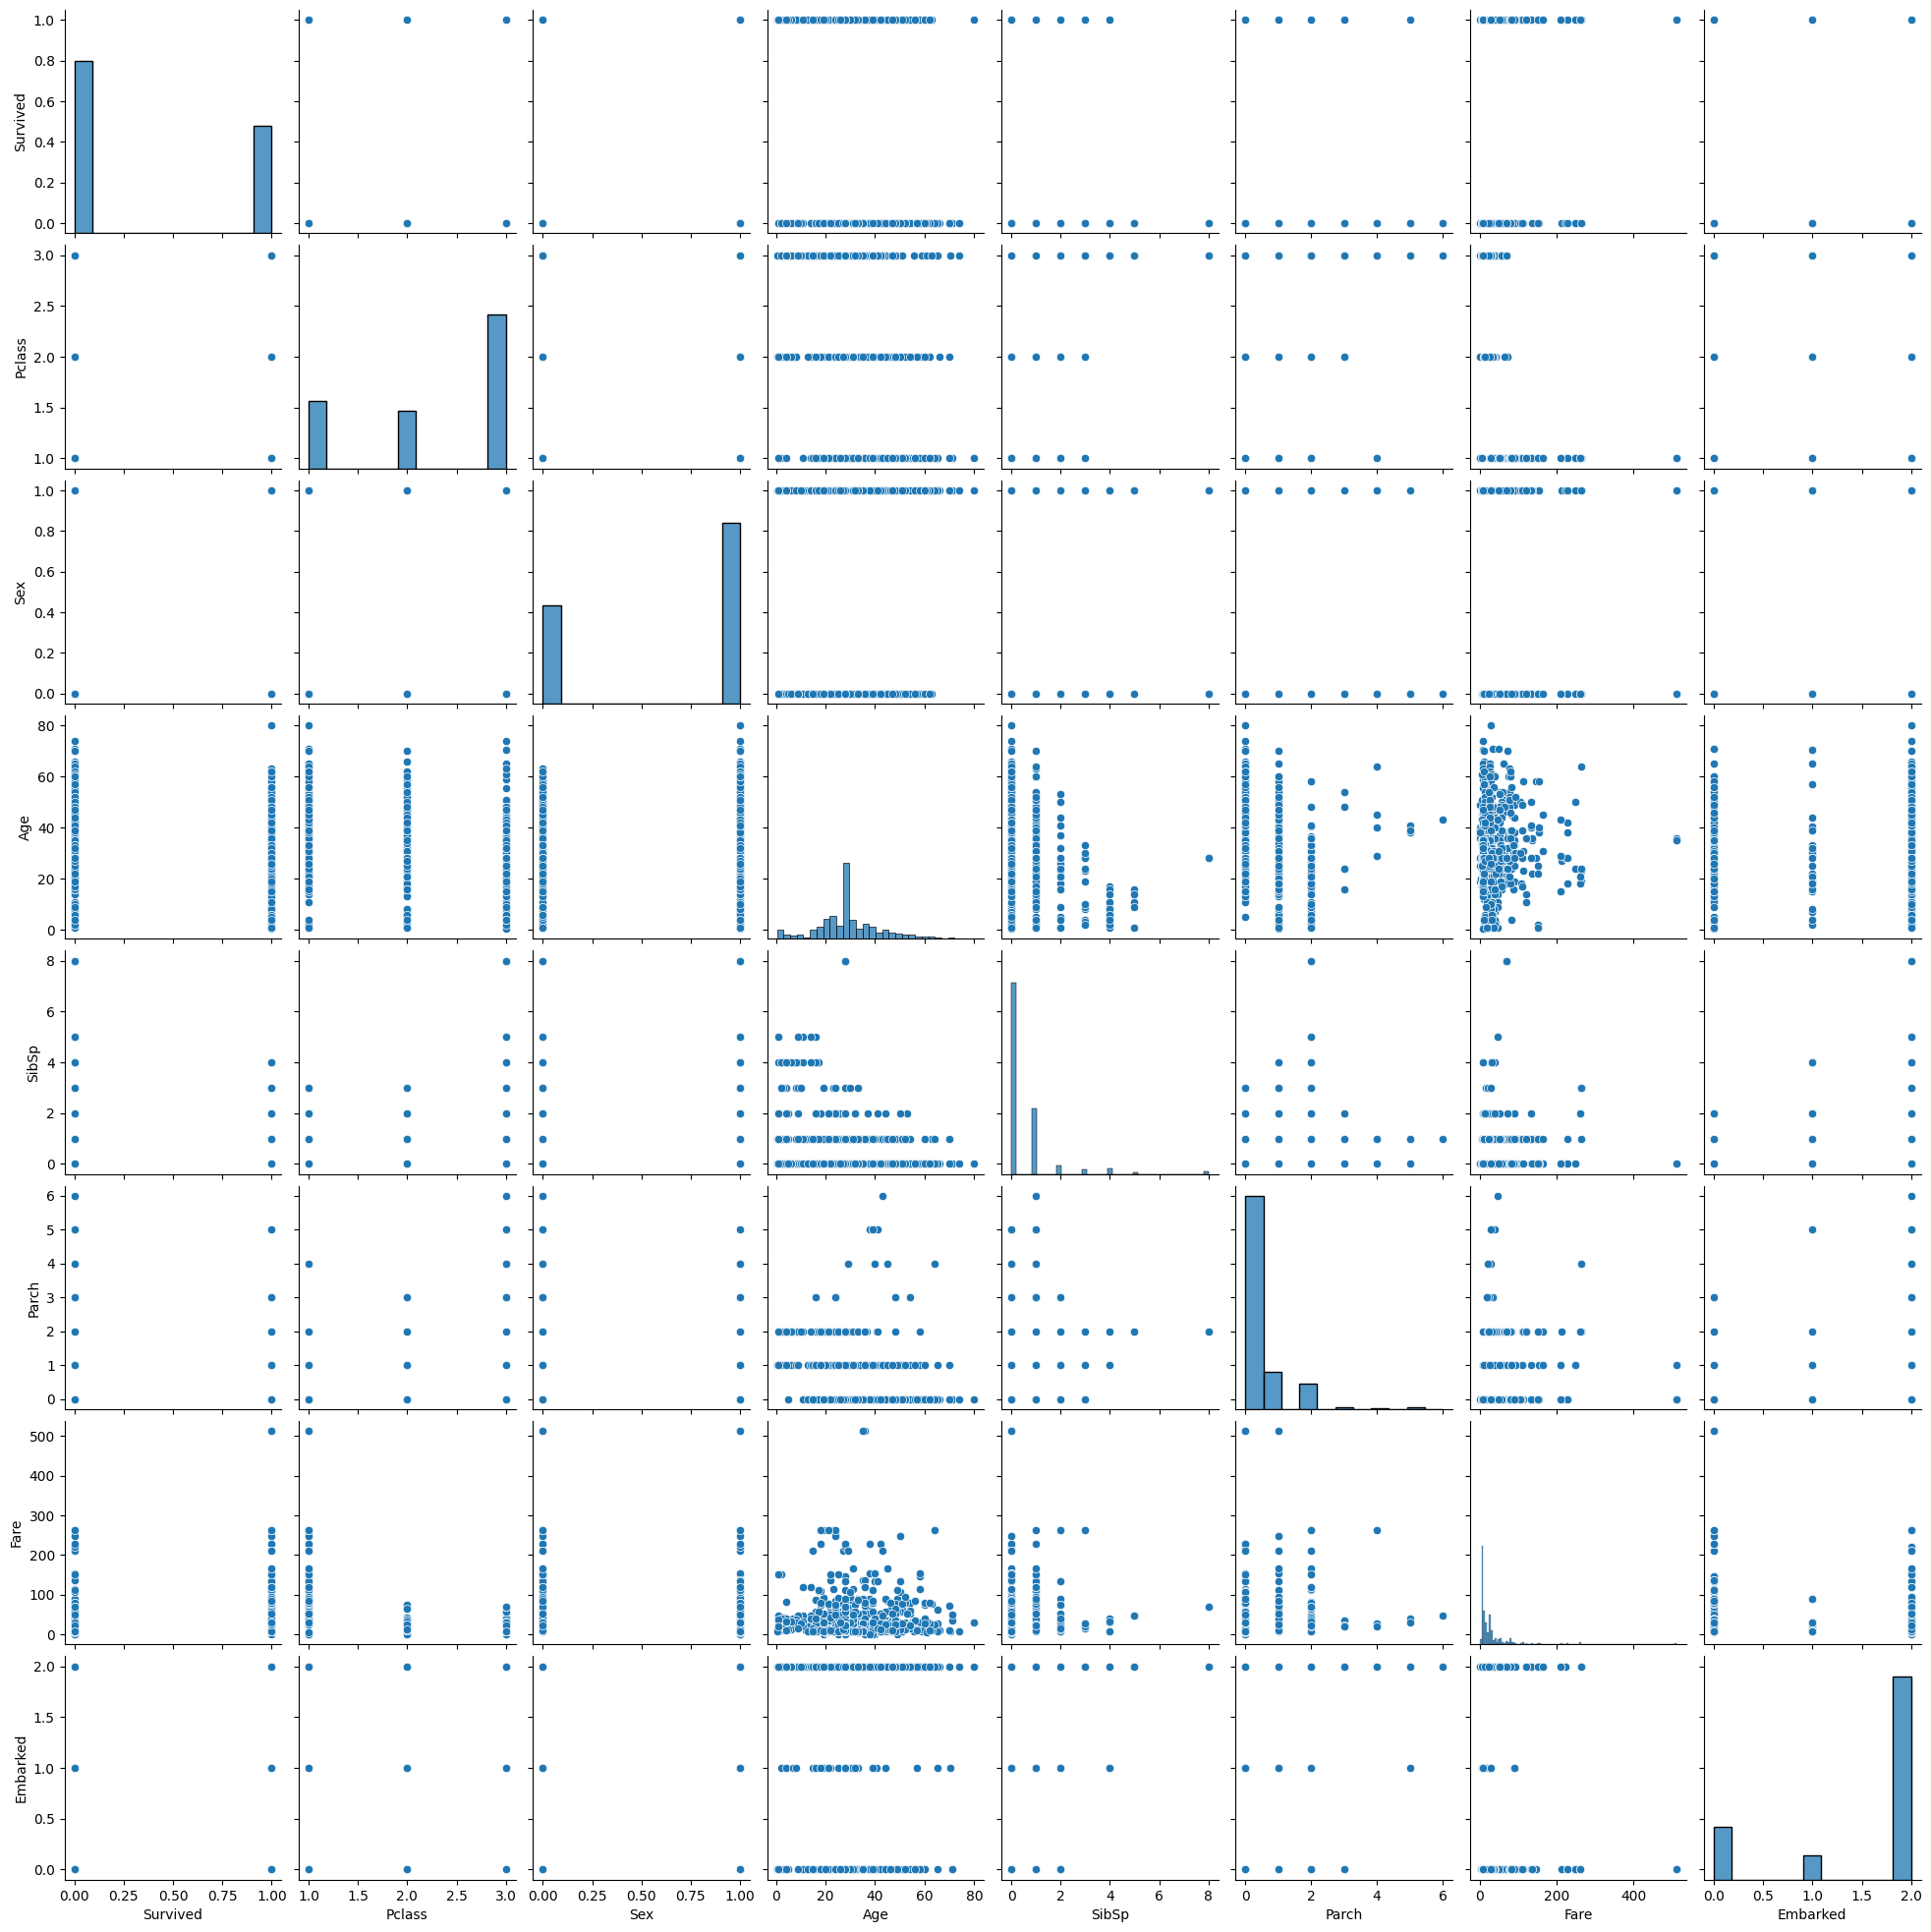

In [32]:
sns.pairplot(titanic)
plt.show()

* max no of columns are categorical columns.
* **Age** and **Fare** columns contains continues values.
* There is a noticeable correlation between the **Pclass** and **Fare**, indicating that higher classes generally paid more for their tickets.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [34]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [35]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
print(X.shape,y.shape)

(891, 7) (891,)


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [37]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [38]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [39]:
log_reg.coef_[0]

array([-0.98634024, -2.61427275, -0.0316293 , -0.29614127, -0.10571235,
        0.00261964, -0.20746989])

In [40]:
Beta_coef = pd.Series(log_reg.coef_[0])
Beta_coef

,0
0,-0.986340
1,-2.614273
2,-0.031629
3,-0.296141
4,-0.105712
5,0.002620
6,-0.207470


In [41]:
coefficients = pd.DataFrame({'Columns':pd.Series(X.columns),
                             'Coefficients':pd.Series(log_reg.coef_[0])})
coefficients

,Columns,Coefficients
0,Pclass,-0.986340
1,Sex,-2.614273
2,Age,-0.031629
3,SibSp,-0.296141
4,Parch,-0.105712
5,Fare,0.002620
6,Embarked,-0.207470


- **A passenger in a higher class (lower number) has 0.99 greater chances of survival compared to those in lower classes.**
- **A male passenger has 2.61 lesser chances of survival compared to a female.**
- **With each additional year of age, there is a 0.03 lesser chance of survival.**
- **A passenger with more siblings or spouses on board has 0.30 lesser chances of survival.**
- **A passenger with more parents or children on board has 0.11 lesser chances of survival.**
- **With each unit increase in fare, there is 0.003 more chances of survival.**
- **A passenger who embarked from certain ports has 0.21 lesser chances of survival.**

In [42]:
log_reg.score(X_train,y_train)

0.8018494055482166

In [43]:
log_reg.score(X_test,y_test)

0.8134328358208955

In [44]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1])

In [45]:
print("Accuracy Score for Logistic Regression is", accuracy_score(y_test,y_pred))

Accuracy Score for Logistic Regression is 0.8134328358208955


In [46]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[67, 11],
       [14, 42]])

In [47]:
px.imshow(conf_matrix,text_auto=True,template='plotly_dark')

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        78
           1       0.79      0.75      0.77        56

    accuracy                           0.81       134
   macro avg       0.81      0.80      0.81       134
weighted avg       0.81      0.81      0.81       134



In [49]:
from sklearn.metrics import roc_auc_score, auc
auc = roc_auc_score(y_test,y_pred)
print("ROC-AUC score :",auc)

ROC-AUC score : 0.8044871794871795


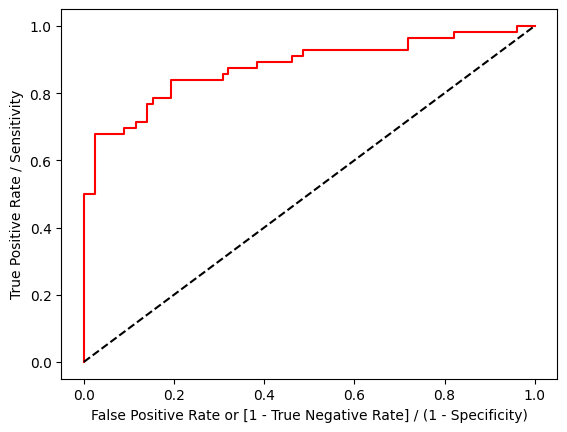

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

In [51]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [52]:
c = 0
for i in titanic['Survived']:
    if i==1:
        c+=1
c/len(titanic)

0.3838383838383838

In [53]:
print("No of First Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 1)]))
print("No of Second Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 2)]))
print("No of Third Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 3)]))

No of First Class Passengers Who Survived:  136
No of Second Class Passengers Who Survived:  87
No of Third Class Passengers Who Survived:  119


* The overall survival rate was approximately 38.38%.
* Females had a significantly higher survival rate compared to males.
* First-class passengers had the highest survival rate, followed by third-class, and then second-class passengers.

In [54]:
import pickle
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)